# 🌟 초보운전 도우미 프로젝트 - 바선생 🌟

- 교통에 대한 사용자 질문을 받아 문제를 분류하고,
그에 맞는 진단 및 해결 방법을 제공하는 웹 기반 학습 도우미입니다.

###  ⚒️ 주요 기능

- 사용자 질문 입력 기능 (예: "브레이크가 이상해요", "차가 시동이 안 걸려요")
- 각 문제에 대한 원인 분석 및 개인이 취할 수 있는 조치 제안
- HTML을 이용한 간단한 사용자 인터페이스 제공


In [ ]:
!pip install python-dotenv
!pip install langchain-core
!pip install langchain_openai
!pip install langgraph
!pip install typing
!pip install openai
!pip install langchain_community
!pip install pypdf
!pip install langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=6d0713c17b4e1902d4f3ca66d650638c20657bd31be45c8bc4ac5ee317835fcd
  Stored in directory: /root/.cache/pip/wheels/9d/67/2f/53e3ef32ec48d11d7d60245255e2d71e908201d20c880c08ee
Successfully built typing


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.7/309.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 4.2 MB/s eta 0:00:

In [57]:
from dotenv import load_dotenv

load_dotenv()

True

In [85]:
import os
from glob import glob

from pprint import pprint
import json

from langchain_core.tools import tool
from langchain_core.tools import tool
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

from langchain_openai import AzureChatOpenAI
llm = AzureChatOpenAI(model="gpt-4.1",temperature=0)

from langchain.agents import create_tool_calling_agent
from langchain.agents import AgentExecutor

from typing import TypedDict
from langchain_openai import AzureChatOpenAI

from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing import Literal

from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from langgraph.types import Command
from langchain_openai import AzureChatOpenAI

from langchain_community.tools import TavilySearchResults

import openai
from dotenv import load_dotenv
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import AzureOpenAIEmbeddings
from langchain_chroma import Chroma
from langchain_openai import AzureOpenAIEmbeddings
from langchain_community.utils.math import cosine_similarity
from langchain_core.runnables import RunnableParallel
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
import glob
from langchain_core.runnables import RunnableLambda

In [59]:
# 상태
class State(TypedDict):   # TypedDict 클래스에서 상속받아 정의, State: 각 단계별로 정도 넘김
    input_message: str    # query
    final_answer: str     # 최종 답변

# RAG 정의


In [64]:
# Get list of all PDF files matching the pattern
pdf_files = glob.glob("/content/data/*.pdf")

pdf_docs = []
for pdf_file in pdf_files:
    loader = PyPDFLoader(pdf_file)
    docs = loader.load()
    pdf_docs.extend(docs)

    from langchain_community.document_loaders import WebBaseLoader

# 기본적인 텍스트 추출
web_loader = WebBaseLoader(
    web_path = [
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=1&cciNo=1&cnpClsNo=1&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=1&cciNo=1&cnpClsNo=2&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=1&cciNo=2&cnpClsNo=1&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=1&cciNo=2&cnpClsNo=2&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=1&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=2&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=3&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=4&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=5&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=6&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=1&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=2&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=3&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=4&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=5&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=6&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=1&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=2&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=3&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=4&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=5&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=1&cnpClsNo=6&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=2&cnpClsNo=1&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=3&cnpClsNo=1&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=2&cciNo=3&cnpClsNo=2&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=3&cciNo=1&cnpClsNo=1&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=3&cciNo=1&cnpClsNo=2&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=3&cciNo=1&cnpClsNo=3&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=4&cciNo=1&cnpClsNo=1&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=4&cciNo=1&cnpClsNo=2&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=4&cciNo=2&cnpClsNo=1&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=4&cciNo=2&cnpClsNo=2&search_put=",
        "https://www.easylaw.go.kr/CSP/CnpClsMain.laf?popMenu=ov&csmSeq=684&ccfNo=4&cciNo=2&cnpClsNo=3&search_put="

    ]
)

# 동기 로딩
web_docs = web_loader.load()

# 3. 통합 문서 리스트
all_docs = pdf_docs + web_docs

print("PDF 문서 수:", len(pdf_docs))
print("웹 문서 수:", len(web_docs))
print("전체 문서 수:", len(all_docs))
print("첫 문서 메타데이터:", all_docs[0].metadata)

###############
# Text Splitting
################

# 재귀적 텍스트 분할기 초기화
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=800,             # 청크 크기
    chunk_overlap=200,           # 청크 중 중복되는 부분 크기
    length_function=len,         # 글자 수를 기준으로 분할
    separators=["\n\n", "\n", " ", ""],  # 구분자 - 재귀적으로 순차적으로 적용
)

# split_documents() 메서드 사용 : Document 객체를 여러 개의 작은 청크 문서로 분할
all_docs = pdf_docs + web_docs # 두 문서 리스트 합치기
chunks = text_splitter.split_documents(all_docs) # 전체 문서 분할
print(f"생성된 텍스트 청크 수: {len(chunks)}")
print(f"각 청크의 길이: {list(len(chunk.page_content) for chunk in chunks)}")
print()

# Check Chunks
print(chunks[3].page_content)
print("=" * 50)
print(chunks[200].page_content)
print("=" * 50)
print(chunks[20].page_content)
print("=" * 50)
print(chunks[21].page_content)

###############
# Embedding
###############


# OpenAIEmbeddings 모델 생성
embeddings_model = AzureOpenAIEmbeddings(model="text-embedding-3-small", dimensions=1024)

# 임베딩 객체 출력
embeddings_model

# 문서 임베딩
texts = [doc.page_content for doc in chunks]
document_embeddings_openai = embeddings_model.embed_documents(texts)

# 임베딩 결과 출력
print(f"임베딩 벡터의 개수: {len(document_embeddings_openai)}")
print(f"각 벡터의 차원: {len(document_embeddings_openai[0])}")

# Chroma 벡터 저장소 생성하기
chroma_db = Chroma.from_documents(
    documents = chunks,
    embedding = embeddings_model,
    persist_directory="./db_traffic" # db 저장
)

# 문서 개수 확인
print("문서 수:", len(chroma_db.get()["documents"]))  # ✅ 안전한 방식

PDF 문서 수: 2265
웹 문서 수: 33
전체 문서 수: 2298
첫 문서 메타데이터: {'producer': 'Antenna House PDF Output Library 7.2.1700', 'creator': 'AH Formatter V7.2 R1 for Windows (x64) : 7.2.1.53371 (2021-09-14T12:45+09)', 'creationdate': '2025-06-25T10:33:09+09:00', 'author': 'UDT 25.5.29', 'moddate': '2025-06-25T10:33:09+09:00', 'keywords': 'ko_KR,hyundaiold,MX5,2025,engine,1.4,Hyundai_MX5', 'title': 'Document', 'subject': 'Hyundai_MX5', 'trapped': '/False', 'source': '/content/data/Owner_s_Manual_싼타페.pdf', 'total_pages': 743, 'page': 0, 'page_label': '1'}
생성된 텍스트 청크 수: 4922
각 청크의 길이: [414, 92, 722, 100, 775, 718, 744, 766, 685, 562, 752, 680, 679, 18, 716, 749, 744, 696, 762, 693, 651, 797, 215, 779, 752, 660, 625, 652, 658, 707, 723, 635, 369, 650, 518, 302, 197, 360, 772, 589, 84, 196, 99, 80, 386, 708, 707, 767, 782, 760, 468, 256, 176, 782, 799, 258, 764, 345, 405, 757, 783, 467, 761, 474, 799, 452, 756, 413, 782, 782, 779, 230, 757, 729, 799, 694, 714, 260, 303, 263, 393, 727, 791, 758, 20, 479, 540, 

# Identify_query (A)
- 받은 질문이 운전 관련 질문인지 아닌지 파악하는 노드

In [67]:
def identify_query(state: State) -> Command[Literal["identify_low_or_maintenance", "no_traffic"]]:
    """받은 질문이 운전 관련 질문인지 아닌지 파악하는 노드"""


    prompt = f"""다음 질문이 운전, 교통, 자동차와 관련된 질문인지 파악해주세요:

    [질문]
    {state['input_message']}

    [답변]
    yes 혹은 no로 답변해줘.
    """

    response = llm.invoke(prompt)
    answer = response.content.lower().strip()

    # return {"Identify": response.content}
    return Command(
        goto="identify_low_or_maintenance" if "yes" in answer else "no_traffic",
    )

def no_traffic(state: State) -> Command[Literal[END]]:
  """교통과 관련되지 않은 질문에 대한 노드"""

  return Command(
      goto=END,
      update={"final_answer": "교통과 관련된 질문만 해주세요."}
  )

# Identify_Law_or_Maintenance (B)
- 받은 질문이 교통법규 관련 질문인지 차량정비 관련 질문인지 파악

In [68]:
def identify_low_or_maintenance(state: State)-> Command[Literal["traffic_law", "traffic_general"]]:
    """받은 질문이 운전법규/차량정비 관련 질문인지 아니면 운전 관련 질문인지 파악하는 노드"""


    prompt = f"""다음 질문이 운전법규/차량정비 관련 질문인지 아닌지 파악해주세요:

    [질문]
    {state['input_message']}

    [답변]
    yes 혹은 no로 답변해줘.

    """

    response = llm.invoke(prompt)
    answer = response.content.lower().strip()

    return Command(
        goto="traffic_law" if "yes" in answer else "traffic_general")
        # update={"summary": summary}

# Traffic_Law (C)
- 차량법규 관련 질문에 답변
- RAG, LLM

In [69]:
def traffic_law(state: State) -> Command[Literal[END]]:
    """교통 및 운전 관련 법과 규칙에 관한 노드"""
    # OpenAIEmbeddings 모델 생성
    embeddings_model = AzureOpenAIEmbeddings(model="text-embedding-3-small", dimensions=1024)

    # 저장된 벡터 저장소를 가져오기
    chroma_db = Chroma(
      persist_directory="./db_traffic",
      embedding_function=embeddings_model
    )

    # mmr 검색기 생성
    retriever = chroma_db.as_retriever(
      search_type="mmr",
      search_kwargs={"k": 4, "fetch_k":10,"lambda_mult": 0.4},
    )

    # template
    template = """주어진 컨텍스트를 기반으로 질문에 답변하시오.

    [지침]
    - 컨텍스트에 있는 정보만을 사용하여 답변할 것
    - 불확실한 경우 명확히 그 불확실성을 표현할 것
    - 답변은 논리적이고 구조화된 형태로 제공할 것
    - 답변은 한국어를 사용할 것

    [컨텍스트]
    {context}

    [질문]
    {question}

    [답변]
    """

    prompt = ChatPromptTemplate.from_template(template)

    # 문서 포맷팅
    def format_docs(docs):
        return "\n\n".join([f"{doc.page_content}" for doc in docs])

    # RAG 체인 생성
    rag_chain = (
        RunnableParallel(
            {
                "context": retriever | format_docs,
                "question": RunnablePassthrough()
            }
        )
        | prompt
        | llm
        | StrOutputParser()
    )

    # 체인 실행
    query = state["input_message"]
    output = rag_chain.invoke(query)

    # 상태 업데이트와 함께 다음 노드로 라우팅
    return Command(
        goto=END,
        update={"final_answer": output}
    )


# traffic_general (E)
- 이외의 교통 관련 사항 답변
- Web search, LLM

In [134]:
def traffic_general(state: State) -> Command[Literal[END]]:
  """교통 법령 및 차량 정비 외의 교통에 관한 노드"""

  # define tool
  tool = TavilySearchResults(
      max_result=3,
      search_depth="advanced",
      include_answer=True,
      include_raw_content=True,
      include_images=True
  )


  result = tool.invoke(state["input_message"])

  # template
  template = """주어진 컨텍스트를 기반으로 질문에 답변하시오.

  [지침]
  - 컨텍스트에 있는 정보만을 사용하여 답변할 것
  - 불확실한 경우 명확히 그 불확실성을 표현할 것
  - 답변은 논리적이고 구조화된 형태로 제공할 것
  - 답변은 한국어를 사용할 것

  [컨텍스트]
  {context}

  [질문]
  {question}

  [답변]
  """


  prompt = ChatPromptTemplate.from_template(template)

  # RAG 체인 생성
  rag_chain = (
      RunnableParallel(
          {
              "context": tool,
              "question": RunnablePassthrough()
          }
      )
      | prompt
      | llm
      | StrOutputParser()
  )


  # 체인 실행
  query = state["input_message"]
  output = rag_chain.invoke(query)

  # 상태 업데이트와 함께 다음 노드로 라우팅
  return Command(
      goto=END,
      update={"final_answer": output}
  )


# Workflow

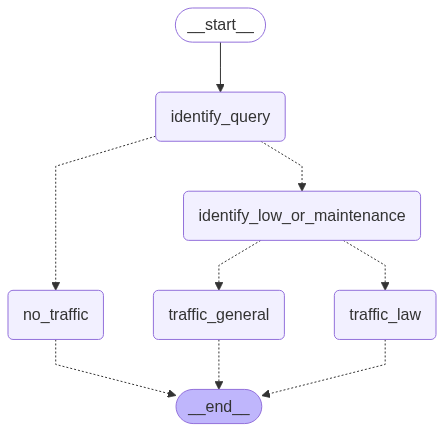

In [135]:
# 워크플로우 구성
workflow = StateGraph(State)

# 노드 추가
workflow.add_node("identify_query", identify_query)
workflow.add_node("identify_low_or_maintenance", identify_low_or_maintenance)
workflow.add_node("no_traffic", no_traffic)
workflow.add_node("traffic_general", traffic_general)
workflow.add_node("traffic_law", traffic_law)

# 기본 엣지 추가
workflow.add_edge(START, "identify_query")

# 그래프 컴파일
graph = workflow.compile()

# 그래프 시각화
display(Image(graph.get_graph().draw_mermaid_png()))

In [144]:
text = "화물자동차의 적재 제한에 대해 알려줘"
#text = "브레이크 망가지면 어떻게 해야 해?"
#text = "자동차 유리세정제를 어디서 구매할 수 있을까?"
#text = "오늘 점심 뭐 먹을까?"

# Implement
initial_state = {
    "input_message": text, # text는 input query로 대체
}

from IPython.display import Markdown, display
from pprint import pprint

for chunk in graph.stream(initial_state, stream_mode="values"):
#    pprint(chunk)   # 필요하면 출력
#    print("=" * 100)

    final_answer = chunk.get('final_answer')
    if final_answer:
        display(Markdown(final_answer))

[답변]

1. 관련 법령  
화물자동차의 적재 제한은 「도로교통법」 제39조제1항 및 「도로교통법 시행령」 제22조에 근거합니다.

2. 적재중량 제한  
- 화물자동차의 적재중량은 해당 차량의 구조 및 성능에 따라 정해진 적재중량의 110% 이내로 제한됩니다.  
- 즉, 차량이 허용하는 적재중량을 초과하여 적재해서는 안 됩니다.

3. 적재용량 제한  
- 화물자동차, 이륜자동차, 소형 3륜자동차의 경우에도 정해진 적재용량을 초과해서 적재할 수 없습니다.

4. 준수 이유  
- 적정 기준을 초과한 승차나 적재는 교통사고 발생 위험을 높이고, 사고 발생 시 손해의 범위도 확대될 수 있습니다.  
- 또한 도로의 훼손을 일으켜 다른 운전자의 안전운전을 방해할 수 있으므로, 반드시 정해진 방법과 범위 내에서 적재해야 합니다.

5. 요약  
- 화물자동차는 구조 및 성능에 따른 적재중량의 110% 이내로만 적재할 수 있습니다.  
- 적재용량도 정해진 기준을 초과해서는 안 됩니다.  
- 이를 위반할 경우 법적 제재를 받을 수 있습니다.

※ 추가적인 세부 기준이나 예외사항은 컨텍스트에 명시되어 있지 않으므로, 위 내용이 제공 가능한 모든 정보입니다.